In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Shopify Data Science Challenge**

Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn

import re  

import nltk
nltk.download('wordnet')

from collections import Counter
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn

import re  

import pandas as pd
import requests
import json
import re
import numpy as np
from typing import List, Tuple
import time
import json

from tqdm import tqdm
import time
import pandas as pd
import requests
import json
import re
import numpy as np
from typing import List, Tuple
import time
import json
import re
 
import argparse
import pandas as pd
import numpy as np
import ast

import sys
import requests
import json
from collections import Counter

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import seaborn as sns
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
cd gdrive/My Drive/Colab Notebooks/222

/content/gdrive/My Drive/Colab Notebooks/222


In [5]:
data = pd.read_csv('winter_data_science.csv')

In [7]:
data.shape

(5000, 7)

In [6]:
data.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52


In [22]:
data['payment_method'].value_counts()

credit_card    1735
debit          1671
cash           1594
Name: payment_method, dtype: int64

In [21]:
data.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [17]:
print(data['order_id'].nunique())
print(data['shop_id'].nunique())
print(data['user_id'].nunique())

5000
100
301


In [20]:
#average order value (AOV);  
#When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13.
#data over a 30 day window

In [24]:
data['order_amount'].mean()

3145.128

In [27]:
#so the average order amount is reported
#so, we need to find a metric that better represents the data

In [26]:
data.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52


In [29]:
data['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

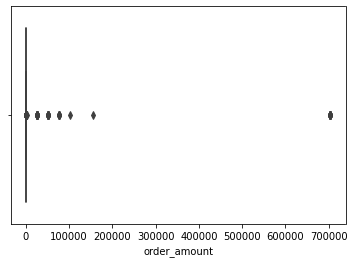

In [58]:
sns.boxplot(x = data['order_amount'])

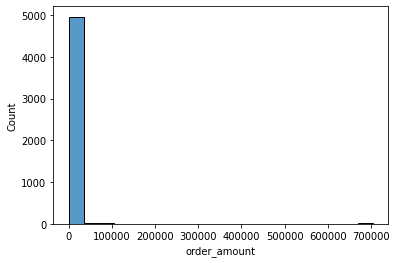

In [59]:
sns.histplot(data['order_amount'], bins = 20)

In [50]:
#so, we have outliers


In [49]:
Q1 = data['order_amount'].quantile(0.25)
Q3 = data['order_amount'].quantile(0.75)
IQR = Q3 - Q1

In [53]:
Q1

163.0

In [51]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [54]:
print(lower)
print(upper)

-177.5
730.5


In [75]:
data[data.order_amount>1000].shape

(71, 7)

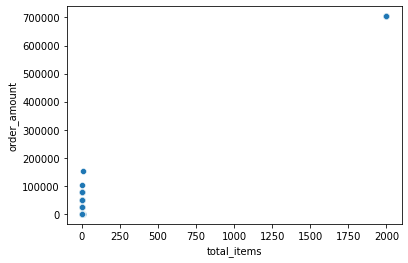

In [77]:
sns.scatterplot(data = data, x = "total_items", y = "order_amount")

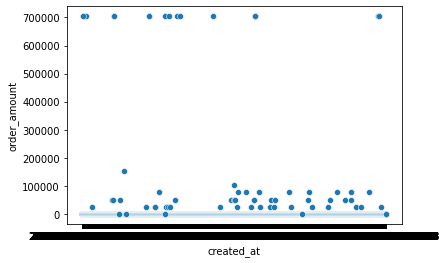

In [78]:
sns.scatterplot(data = data, x = "created_at", y = "order_amount")

In [79]:
#from the above 2 graphs, it seems that time does not seem to have a relationship with abnormally high order_amounts
#however, if we have a large no of total_items, then order_amount is high for sure

In [80]:
data.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52


In [91]:
outlier_data = data[data['order_amount']>1200]

In [92]:
outlier_data['shop_id'].value_counts()

78    46
42    20
Name: shop_id, dtype: int64

In [95]:
outlier_data[outlier_data['total_items']>1200].head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00


In [103]:
print(outlier_data[outlier_data['total_items']>1200]['user_id'].unique())

[607]


In [96]:
outlier_data[outlier_data['total_items']<1200].head(5)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42


In [119]:
sns.set(style="whitegrid")

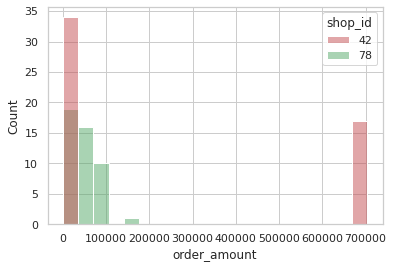

In [124]:
sns.histplot(data = data[data['shop_id'].isin([78,42])] , x = "order_amount", hue = "shop_id", bins = 20 , color = '#0f0f0f', palette=['r', 'g'])

In [122]:
#so shop id 42 and 78 have some order_amount which are not abnormally high

In [105]:
print(outlier_data[outlier_data['total_items']<1200]['user_id'].unique())

[990 936 983 967 760 878 800 944 970 775 797 926 867 912 812 907 810 855
 709 834 707 935 861 915 962 890 869 814 817 740 910 745 927 928 982 828
 766 889 852 946 787 960 756 969 866 997 818 823]


In [106]:
#so, for shop 42, we have 2000 items at once; so, the order_amount is abnormally high because of one user_id -> 607


In [107]:
#for shop 78, we have order_amount super high, but for a few high price luxury items; also it has multiple customers

In [108]:
#we are going to assume that dataset is correct for the next steps in this project
#additionally, if we are going forward with analysis, we have to include the shop_ids-> (78, 42) which have order_amount in the normal range

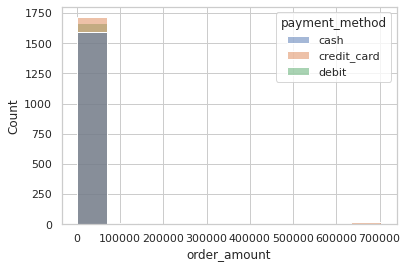

In [170]:
sns.histplot(data = data, x = "order_amount", hue = "payment_method", bins = 10)

In [171]:
#check for payment_method after removing outliers

In [130]:
newdata = data.copy()

In [156]:
newdata = data[data['order_amount']<1200]

In [157]:
newdata.shape

(4934, 7)

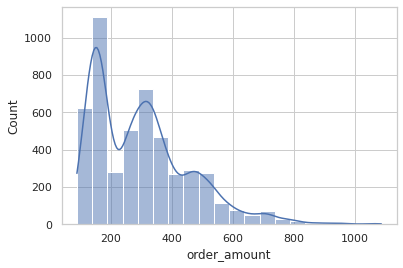

In [158]:
sns.histplot(newdata['order_amount'], bins = 20, kde = True)

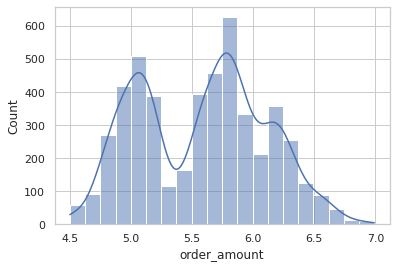

In [159]:
sns.histplot(np.log(newdata['order_amount']), bins = 20, kde = True)

In [136]:
#the data still looks right skewed, so the appropriate target has be a log;

In [165]:
newdata.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,log_order_amount
0,1,53,746,224,2,cash,2017-03-13 12:36:56,5.411646
1,2,92,925,90,1,cash,2017-03-03 17:38:52,4.499810


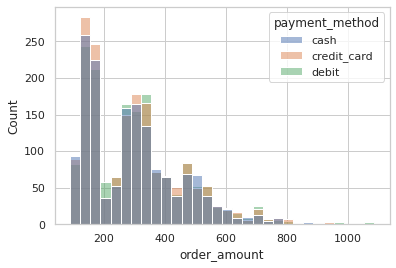

In [172]:
sns.histplot(data = newdata, x = "order_amount", hue = "payment_method", bins = 30)

In [185]:
newdata.groupby('payment_method')['order_amount'].agg(['mean', 'size'])

,mean,size
payment_method,,
cash,296.340534,1574
credit_card,301.415105,1708
debit,307.510291,1652


In [183]:
#so, payment_id does not have much changes between the order_amounts

# Question 1




1.   Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
2.   What metric would you report for this dataset?
3. What is its value?






1.   We want to do some analysis of the average order value (AOV)
2.   To do so, we have to first take care of outliers. So, in our case when we present AOVs, we present it in 3 groups: common orders, high priced order and numerous orders
3. Additionally, if each shop sells only one model of sneaker, then we are presenting average order over the month







In [160]:
newdata.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52


In [161]:
min(newdata['order_amount'])

90

In [162]:
newdata['log_order_amount'] = np.log(newdata['order_amount'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [163]:
newdata.head(3)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,log_order_amount
0,1,53,746,224,2,cash,2017-03-13 12:36:56,5.411646
1,2,92,925,90,1,cash,2017-03-03 17:38:52,4.499810
2,3,44,861,144,1,cash,2017-03-14 4:23:56,4.969813


Answers


1.   Things wrong with initial Average Order Value (AOV) were outliers and the different kind of selling Activity for some shops

2.   New Metric: Average of Log of Order Amount of shops. The median is a good statistic, but for any machine learning task -> log of order amount is a better stat. This is also because it transforms the target into a normal distribution; additionally, for each shop, we do not have large number of variables, so median is not a better stat than the average of log amounts. Below is the new dataset with metric provided. The average of log of order amount is 5.578
3. Finally, Shop '42' -> sells numerous items at once and Shop '78' has luxury goods sold; so, they will report there activity seperately





In [186]:
#now, we will present metric results 

In [188]:
newdata['log_order_amount'].mean()

5.577754181005866

Text(0.5, 1.0, 'Right Skewed Order Amount')

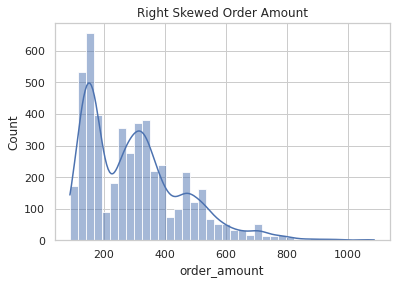

In [201]:
sns.histplot(newdata['order_amount'], kde = True)
plt.title('Right Skewed Order Amount')

Text(0.5, 1.0, 'Log of Order Amount')

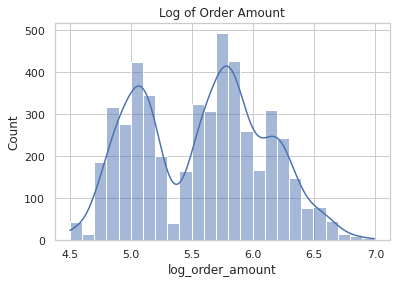

In [202]:
sns.histplot(newdata['log_order_amount'], kde = True)
plt.title('Log of Order Amount')

In [208]:
newdata.head(2)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,log_order_amount
0,1,53,746,224,2,cash,2017-03-13 12:36:56,5.411646
1,2,92,925,90,1,cash,2017-03-03 17:38:52,4.499810


In [217]:
newdata[~newdata.shop_id.isin([42, 78])].set_index('shop_id').head(6)

,order_id,user_id,order_amount,total_items,payment_method,created_at,log_order_amount
shop_id,,,,,,,
53,1,746,224,2,cash,2017-03-13 12:36:56,5.411646
92,2,925,90,1,cash,2017-03-03 17:38:52,4.499810
44,3,861,144,1,cash,2017-03-14 4:23:56,4.969813
18,4,935,156,1,credit_card,2017-03-26 12:43:37,5.049856
18,5,883,156,1,credit_card,2017-03-01 4:35:11,5.049856
58,6,882,138,1,credit_card,2017-03-14 15:25:01,4.927254


In [203]:
log_mean_aov = newdata[~newdata.shop_id.isin([42, 78])].groupby('shop_id')['log_order_amount'].mean().reset_index()

In [204]:
log_mean_aov.head(3)

,shop_id,log_order_amount
0,1,5.656176
1,2,5.036961
2,3,5.613531


In [206]:
log_mean_aov.to_csv('log_mean_aov_per_shop.csv', index=False)

**Question 2**

1.   How many orders were shipped by Speedy Express in total?
2.   What is the last name of the employee with the most orders?
3. What product was ordered the most by customers in Germany?



In [218]:
#SQL question

a)How many orders were shipped by Speedy Express in total?

<br>


SELECT count(distinct o.OrderID)

FROM Orders o

Join Shippers s

on o.ShipperID = s.ShipperID

where s.ShipperID = 1

<br>

total orders shipped is 54

b) What is the last name of the employee with the most orders?

<br>


select cte.LastName

from (

select e.EmployeeID, e.LastName, Count(o.OrderID)

from Employees e

join Orders o

where e.EmployeeID = o.EmployeeID 

group by 1

order by 3 desc

limit 1 ) cte


<br>
lastname is Peacock

c) What product was ordered the most by customers in Germany?

<br>

select cte.ProductName from (

select p.ProductName, c.Country, sum(od.Quantity)

from Products p

join OrderDetails od on p.ProductID = od.ProductID

join Orders o on od.OrderID = o.OrderID'

join Customers c on o.CustomerID = c.CustomerID

where c.Country = 'Germany'

group by 1

order by 3 desc

limit 1 ) cte

<br>

'Boston Crab Meat' was ordered the most in Germany -> 160 times